# **Proyek Analisis Data: Bike Sharing Dataset**
- **Nama:** Melani Putri Azalia
- **Email:** azalliamelani@gmail.com
- **ID Dicoding:** azalliamelani

## **Menentukan Pertanyaan Bisnis**

- Bagaimana performa peminjaman sepeda pada 2 tahun terakhir?
- Bagaimana Kondisi Weather/Cuaca Dapat Mempengaruhi Jumlah Peminjaman Sepeda Pada Casual & Registered User?
- Apakah variabel season mempengaruhi jumlah peminjaman sepeda pada Casual & Registered User?
- Manakah peminjam terbanyak setiap musim? Pada musim apa mereka banyak meminjam sepeda?

## **Import Semua Packages/Library yang Digunakan**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **Data Wrangling**

### **Gathering Data**

1. Membuat izin akses ke Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2. Mengimpor dataset day.csv yang sudah diupload ke Google Drive & menampilkan 5 data teratas.

In [ ]:
day_df = pd.read_csv('/content/drive/MyDrive/bikesharinganalysis/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


3. Mengimpor dataset hour.csv yang sudah diupload ke Google Drive & menampilkan 5 data teratas.

In [ ]:
hour_df = pd.read_csv('/content/drive/MyDrive/bikesharinganalysis/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## **Assessing Data**

1. Menilai data day_df. Hasilnya, tidak ditemukan missing values. Namun, pada kolom dteday data typenya bukan object, namun harus berupa datetime karena berisi tanggal.

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


2. Pengecekan jumlah duplikasi data yang ada. Pada dataset day.csv tidak ditemukan duplikasi data.

In [ ]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


3. Ringkasan parameter statistik dataset day.csv.

In [ ]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


4. Menilai dataset hour.csv. Dari penilaian ini, tidak ditemukan missing values. Namun, data type pada kolom dteday tidak sesuai, untuk tanggal tipe datanya harus berupa datetime.

In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


5. Membuat jumlah duplikasi dataset hour.csv. Disini terlihat duplikasi berjumlah 0, dimana berarti tidak ditemukan duplikasi pada dataset hour.csv.

In [ ]:
print("Jumlah duplikasi: ",hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

1. Menghapus kolom yang tidak digunakan.


> Pada analisis kali ini, saya hanya akan menggunakan dataset atau tabel day. Karena saya merasa isi dari tabel day & hour sama saja, kecuali kolom hr. Hal ini dilakukan agar memudahkan saya menganalisis data.


> Kemudian saya menghapus kolom instant & windspeed. Karena:
*   Instant: Tidak berpengaruh dengan pertanyaan bisnis yang ada.
*   Windspeed: Yang diperlukan dalam analisis ini hanya temperature & humidity.







In [ ]:
drop_column = ['instant', 'windspeed']

for i in day_df.columns:
  if i in drop_column:
    day_df.drop(labels=i, axis=1, inplace=True)

day_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,82,1518,1600


2. Mengganti tipe data kolom dteday.


> Kolom dteday sebelumnya memiliki tipe data berupa object. Tipe data ini digunakan untuk string. Sedangkan kolom dteday merupakan tanggal yang harusnya memiliki tipe data datetime.



In [ ]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    datetime64[ns]
 1   season      731 non-null    int64         
 2   yr          731 non-null    int64         
 3   mnth        731 non-null    int64         
 4   holiday     731 non-null    int64         
 5   weekday     731 non-null    int64         
 6   workingday  731 non-null    int64         
 7   weathersit  731 non-null    int64         
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  casual      731 non-null    int64         
 12  registered  731 non-null    int64         
 13  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(10)
memory usage: 80.1 KB


3. Mengganti nama beberapa kolom.


> Saya merasa kesulitan untuk membaca nama pada kolom dataset day_df, untuk memudahkan analisis, maka saya mengganti beberapa nama kolom tersebut.



In [ ]:
# Melakukan penggantian nama kolom pada DataFrame day_df menggunakan metode rename()
# Kolom-kolom yang diganti namanya adalah:
# 'dteday' menjadi 'dateday'
# 'yr' menjadi 'year'
# 'mnth' menjadi 'month'
# 'weathersit' menjadi 'weather'
# 'cnt' menjadi 'count'
# Penggantian nama kolom dilakukan untuk memperjelas arti dan konsistensi nama kolom dalam analisis data.
day_df.rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weather',
    'cnt': 'count'
}, inplace=True)

# Menampilkan lima baris pertama dari DataFrame day_df setelah perubahan nama kolom
day_df.head()


,dateday,season,year,month,holiday,weekday,workingday,weather,temp,atemp,hum,casual,registered,count
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,82,1518,1600


4. Mengganti Angka Menjadi Keterangan


> Pada tabel day_df, isi field dari kolom bulan dan hari digambarkan dalam skala angka. Hal ini akan membuat saya bingung, karena saya harus memikirkan angka tersebut bulan apa atau hari apa?



> Maka dari itu, saya mengganti isi field tersebut ke nama bulan & hari yang dapat dibaca dengan mudah.





In [ ]:
day_df['month'] = day_df['month'].map({
    1:'Jan', 2:'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})
day_df['season'] = day_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
day_df['weekday'] = day_df['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})
day_df['weather'] = day_df['weather'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})

In [ ]:
day_df['season'] = day_df.season.astype('category')
day_df['year'] = day_df.year.astype('category')
day_df['month'] = day_df.month.astype('category')
day_df['holiday'] = day_df.holiday.astype('category')
day_df['weekday'] = day_df.weekday.astype('category')
day_df['workingday'] = day_df.workingday.astype('category')
day_df['weather'] = day_df.weather.astype('category')

day_df.head()

,dateday,season,year,month,holiday,weekday,workingday,weather,temp,atemp,hum,casual,registered,count
0,2011-01-01,Spring,0,Jan,0,Sat,0,Misty/Cloudy,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,Spring,0,Jan,0,Sun,0,Misty/Cloudy,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,Spring,0,Jan,0,Mon,1,Clear/Partly Cloudy,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,Spring,0,Jan,0,Tue,1,Clear/Partly Cloudy,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,Spring,0,Jan,0,Wed,1,Clear/Partly Cloudy,0.226957,0.229270,0.436957,82,1518,1600


In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dateday     731 non-null    datetime64[ns]
 1   season      731 non-null    category      
 2   year        731 non-null    category      
 3   month       731 non-null    category      
 4   holiday     731 non-null    category      
 5   weekday     731 non-null    category      
 6   workingday  731 non-null    category      
 7   weather     731 non-null    category      
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  casual      731 non-null    int64         
 12  registered  731 non-null    int64         
 13  count       731 non-null    int64         
dtypes: category(7), datetime64[ns](1), float64(3), int64(3)
memory usage: 46.5 KB


## Exploratory Data Analysis (EDA)

### **Eksplorasi Data day_df**

1. Melihat Parameter Statistik Dari Data day_df

In [ ]:
day_df.describe(include="all")

<ipython-input-70-51e59b52191b>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day_df.describe(include="all")


,dateday,season,year,month,holiday,weekday,workingday,weather,temp,atemp,hum,casual,registered,count
count,731,731,731.0,731,731.0,731,731.0,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,731,4,2.0,12,2.0,7,2.0,3,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-01 00:00:00,Fall,1.0,Aug,0.0,Mon,1.0,Clear/Partly Cloudy,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,188,366.0,62,710.0,105,500.0,463,NaN,NaN,NaN,NaN,NaN,NaN
first,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,848.176471,3656.172367,4504.348837
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.183051,0.162961,0.142429,686.622488,1560.256377,1937.211452
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,2.000000,20.000000,22.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,315.500000,2497.000000,3152.000000


2. Membandingkan Jumlah Penyewa Sepeda Saat Weekday vs Weekend

In [ ]:
day_df.groupby(by='weekday').agg({
    'count':['max','min','mean','std']
})

count                                
          max   min         mean          std
weekday                                      
Fri      8362  1167  4690.288462  1874.624870
Mon      7525    22  4338.123810  1793.074013
Sat      8714   627  4550.542857  2196.693009
Sun      8227   605  4228.828571  1872.496629
Thu      7804   431  4667.259615  1939.433317
Tue      7767   683  4510.663462  1826.911642
Wed      8173   441  4548.538462  2038.095884

Dari tabel, terlihat bahwa peminjaman sepeda terbanyak dilakukan pada saat weekend, yakni hari Sabtu. Disusul dengan hari Jumat dan Rabu.

3. Mengelompokkan Tabel Temperature Berdasarkan Season (Musim)

In [ ]:
day_df.groupby(by='season').agg({
    'temp':['max','min','mean','std']
})

temp                              
             max       min      mean       std
season                                        
Fall    0.861667  0.469167  0.706309  0.070848
Spring  0.572500  0.059130  0.297748  0.102735
Summer  0.808333  0.253043  0.544405  0.122650
Winter  0.657500  0.220833  0.422906  0.107834

4. Mengelompokkan Tabel Atemp Berdasarkan Season (Musim)

In [ ]:
day_df.groupby(by='season').agg({
    'atemp':['max','min','mean','std']
})

atemp                              
             max       min      mean       std
season                                        
Fall    0.840896  0.242400  0.655898  0.072056
Spring  0.548617  0.079070  0.296914  0.099026
Summer  0.757579  0.250339  0.520307  0.108022
Winter  0.607975  0.227913  0.415539  0.095536

5. Mengelompokkan Tabel Humidity Berdasarkan Season (Musim)

In [ ]:
day_df.groupby(by='season').agg({
    'hum':['max','min','mean','std']
})

hum                              
             max       min      mean       std
season                                        
Fall    0.939565  0.360000  0.633482  0.119349
Spring  0.948261  0.000000  0.582903  0.151880
Summer  0.922500  0.254167  0.626948  0.152841
Winter  0.972500  0.333478  0.668719  0.131248

**Tabel Hasil Penggabungan Kelompok Tabel Temp, Atemp, dan Hum Berdasarkan Season**

In [ ]:
day_df.groupby(by='season').agg({
    'temp': ['max', 'min', 'mean','std'],
    'atemp': ['max', 'min', 'mean','std'],
    'hum': ['max', 'min', 'mean','std']
})

temp                                   atemp                      \
             max       min      mean       std       max       min      mean   
season                                                                         
Fall    0.861667  0.469167  0.706309  0.070848  0.840896  0.242400  0.655898   
Spring  0.572500  0.059130  0.297748  0.102735  0.548617  0.079070  0.296914   
Summer  0.808333  0.253043  0.544405  0.122650  0.757579  0.250339  0.520307   
Winter  0.657500  0.220833  0.422906  0.107834  0.607975  0.227913  0.415539   

                       hum                                
             std       max       min      mean       std  
season                                                    
Fall    0.072056  0.939565  0.360000  0.633482  0.119349  
Spring  0.099026  0.948261  0.000000  0.582903  0.151880  
Summer  0.108022  0.922500  0.254167  0.626948  0.152841  
Winter  0.095536  0.972500  0.333478  0.668719  0.131248

Dari hasil tabel di atas, dapat dibuat kesimpulan:

1.   Rata-rata Temperatur terbesar terdapat pada saat Fall Season atau Musim Gugur, yakni sebesar 0.706309.
2.   Rata-rata Atemp terbesar berada pada saat Fall Season atau Musim Gugur, yakni sebesar 0.655898.
3.   Rata-rata Hum atau Kelembapan terbesar terdapat pada saat Winter Season atau Musim Salju, yakni sebesar 0.668719.



6. Melihat Total Jumlah Penyewaan Sepeda Setiap Season

In [ ]:
day_df.groupby(by="season")['count'].sum().sort_values(ascending=False).reset_index()

,season,count
0,Fall,1061129
1,Summer,918589
2,Winter,841613
3,Spring,471348


Peminjam sepeda terbanyak ada di saat Fall Season atau Musim Gugur.

7. Melihat Total Jumlah Peminjam Sepeda Casual & Registered User Berdasarkan Musim

In [ ]:
day_df.groupby(by="season")[['casual', 'registered']].sum().sort_values(by='season', ascending=True).reset_index()

,season,casual,registered
0,Fall,226091,835038
1,Spring,60622,410726
2,Summer,203522,715067
3,Winter,129782,711831


Peminjam sepeda terbanyak berada pada Fall Season dengan jumlah Casual User yakni 226091 dan Registered User sebanyak 835038. Dengan ini, jumlah Registered User lebih mendominasi.

## **Visualization & Explanatory Analysis**

### **Pertanyaan 1: Bagaimana Performa Peminjaman Sepeda Dari 2 Tahun Terakhir?**

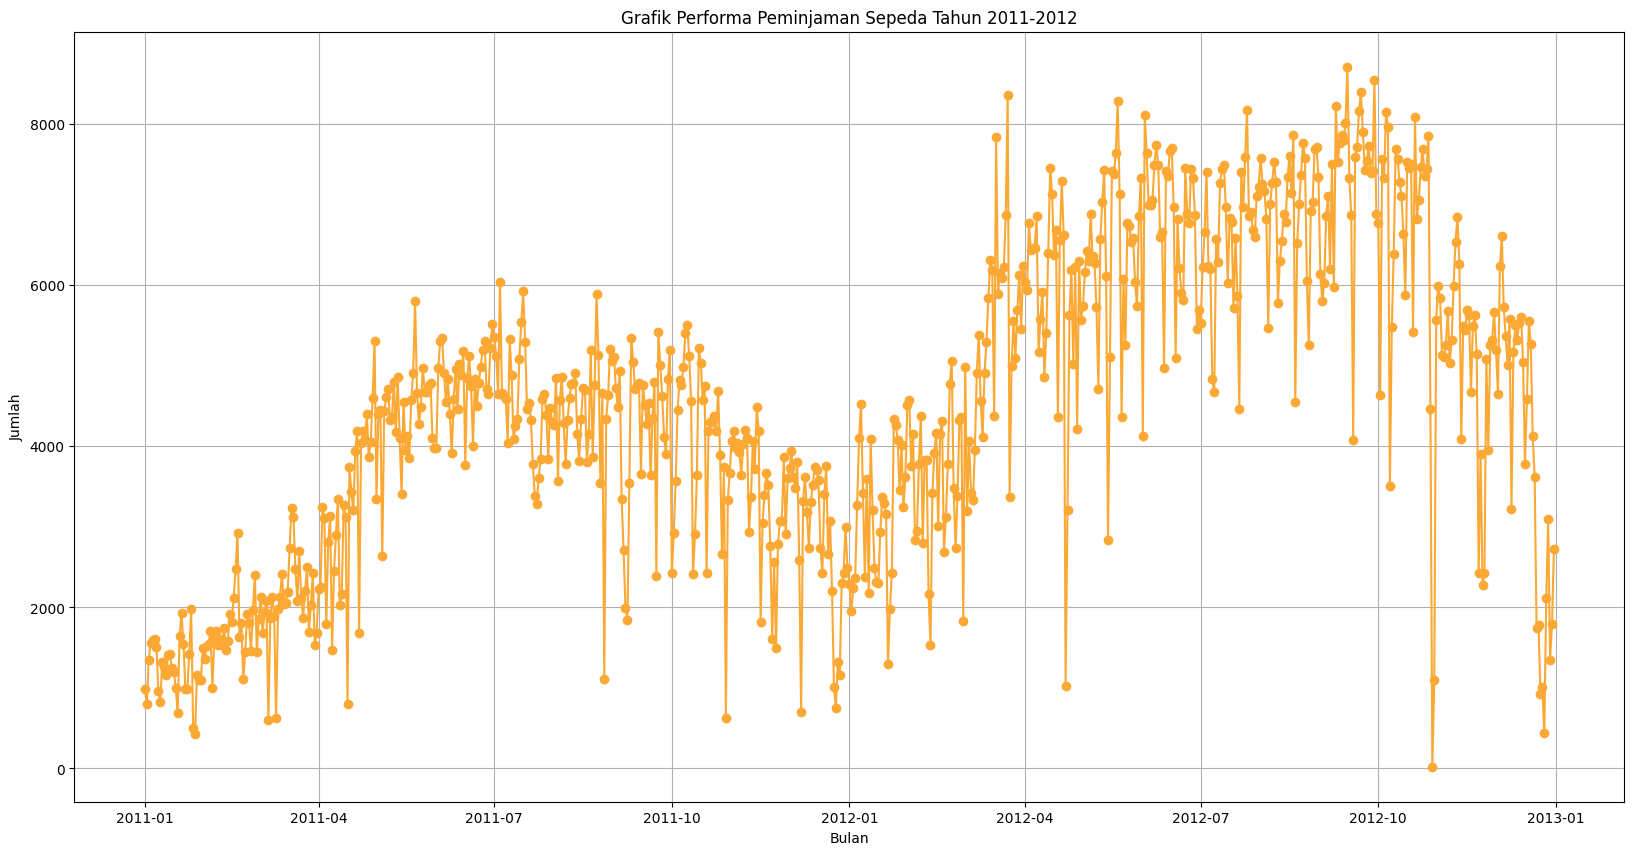

In [ ]:
# Mengatur ukuran figur
plt.figure(figsize=(20, 10))

# Menghitung jumlah pelanggan per bulan pada tahun 2012
monthly_counts = day_df['count'].groupby(day_df['dateday']).max()

# Menampilkan grafik dengan menggunakan plot garis
plt.plot(monthly_counts.index, monthly_counts.values, marker='o', linestyle='-', color='#FBA834')

# Menyertakan label sumbu x
plt.xlabel('Bulan')

# Menyertakan label sumbu y
plt.ylabel('Jumlah')

# Menyertakan judul grafik
plt.title('Grafik Performa Peminjaman Sepeda Tahun 2011-2012')

# Menampilkan grid
plt.grid(True)

# Menampilkan grafik
plt.show()

Berdasarkan visualisasi grafik di atas, dalam 2 tahun terakhir terjadi:
1.   Pada tahun 2011, peminjaman sepeda yang signifikan terjadi pada bulan Juli. Kemudian, penurunan signifikan terjadi pada bulan November dan Desember.
2.   Pada tahun 2012, peminjaman sepeda yang signifikan terjadi pada bulan September. Kemudian, penurunan peminjaman sepeda yang signifikan terjadi pada bulan November.



### **Pertanyaan 2: Bagaimana Kondisi Weather/Cuaca Dapat Mempengaruhi Jumlah Peminjaman Sepeda Pada Casual & Registered User?**



In [ ]:
# Mengelompokkan data dalam DataFrame day_df berdasarkan kondisi cuaca ("weather")
# dan kemudian mengagregasi total jumlah pelanggan "casual", "registered", dan total "count"
# untuk setiap kondisi cuaca. Hasilnya disimpan dalam DataFrame baru user_per_weather.
user_per_weather = day_df.groupby("weather").agg({
    "casual": "sum",
    "registered": "sum",
    "count": "sum"
})

# Menampilkan DataFrame user_per_weather yang berisi total jumlah pelanggan "casual" dan "registered",
# serta total "count" (jumlah total pelanggan) untuk setiap kondisi cuaca yang terdaftar dalam DataFrame day_df.
user_per_weather

,casual,registered,count
weather,,,
Clear/Partly Cloudy,446346,1811606,2257952
Light Snow/Rain,3895,33974,37869
Misty/Cloudy,169776,827082,996858


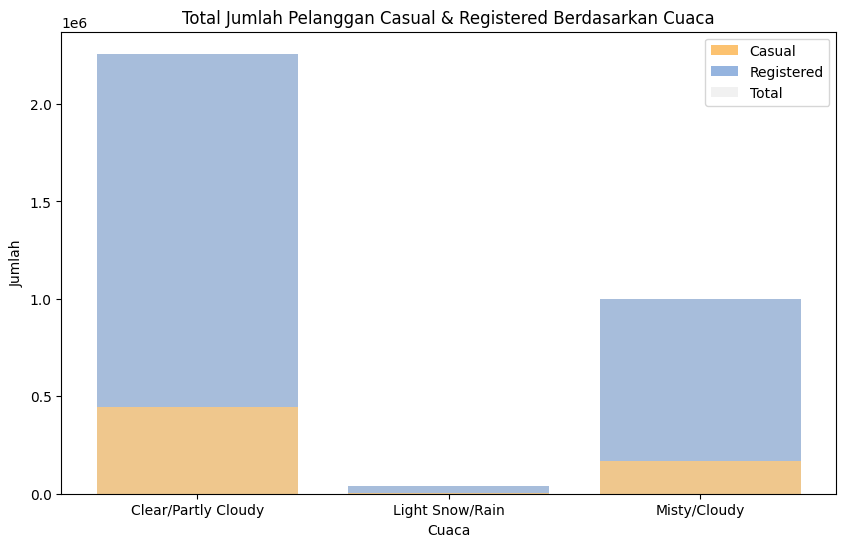

In [ ]:
# Membuat DataFrame user_per_weather yang berisi total jumlah pelanggan "casual" dan "registered",
# serta total "count" (jumlah total pelanggan) untuk setiap kondisi cuaca yang terdaftar dalam DataFrame day_df
user_per_weather = day_df.groupby("weather").agg({
    "casual": "sum",
    "registered": "sum",
    "count": "sum"
}).reset_index()

# Membuat diagram batang untuk DataFrame user_per_weather
plt.figure(figsize=(10, 6))

# Plotting bar chart untuk total jumlah pelanggan "casual" dan "registered", serta total "count" (jumlah total pelanggan) untuk setiap kondisi cuaca
plt.bar(user_per_weather['weather'], user_per_weather['casual'], color='#FBA834', alpha=0.7, label='Casual')
plt.bar(user_per_weather['weather'], user_per_weather['registered'], bottom=user_per_weather['casual'], color='#6895D2', alpha=0.7, label='Registered')
plt.bar(user_per_weather['weather'], user_per_weather['count'], color='#D3D3D3', alpha=0.3, label='Total')

# Menambahkan label sumbu x dan y, serta judul
plt.xlabel("Cuaca")
plt.ylabel("Jumlah")
plt.title("Total Jumlah Pelanggan Casual & Registered Berdasarkan Cuaca")
plt.legend()

# Menampilkan diagram batang
plt.show()


### **Pertanyaan 3: Apakah variabel season mempengaruhi jumlah peminjaman sepeda pada Casual & Registered User?**

In [ ]:
# Mengelompokkan data dalam DataFrame day_df berdasarkan musim ("season")
#dan kemudian menghitung total jumlah pelanggan "casual", "registered", dan total "count"
# untuk setiap musim. Hasilnya disimpan dalam DataFrame baru user_per_season.
user_per_season = day_df.groupby("season").agg({
    "casual": "sum",
    "registered": "sum",
    "count": "sum"
})

# Menampilkan lima baris pertama dari DataFrame user_per_season.
user_per_season.head()


,casual,registered,count
season,,,
Fall,226091,835038,1061129
Spring,60622,410726,471348
Summer,203522,715067,918589
Winter,129782,711831,841613


<ipython-input-82-f0ef057dbed9>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="season", y="count", data=user_per_season, palette=colors)


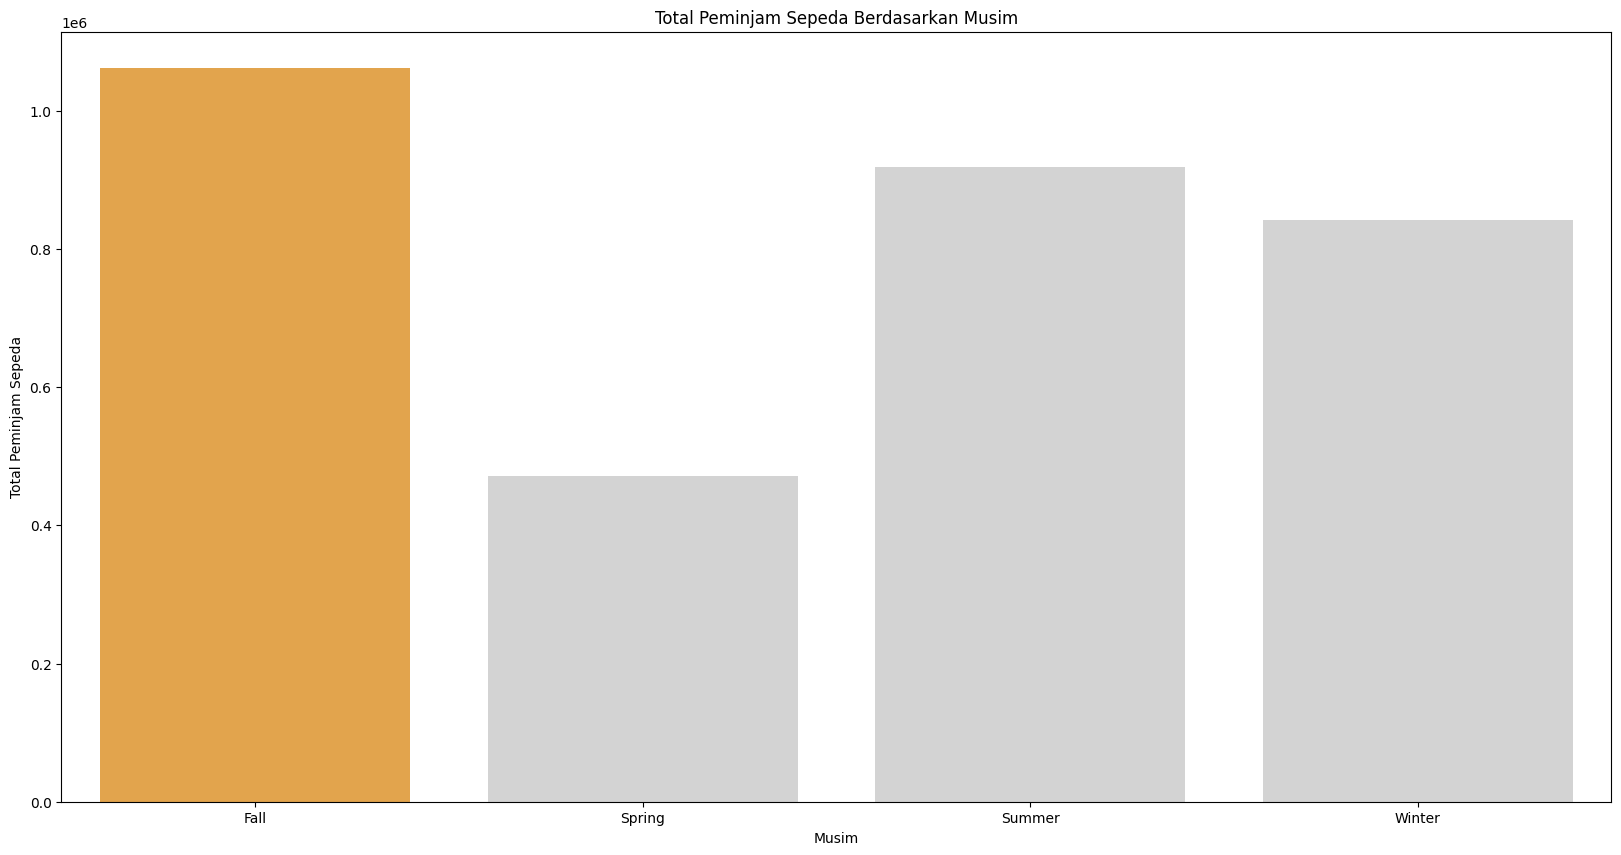

In [ ]:
# List warna yang akan digunakan untuk menggambarkan bar pada diagram batang
colors = ["#FBA834", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

# Membuat figur dengan ukuran 10x6
plt.figure(figsize=(20, 10))

# Menggunakan Seaborn untuk membuat diagram batang
# x adalah musim ("season"), y adalah jumlah peminjam sepeda ("count"),
# data yang digunakan adalah user_per_season, dan menggunakan palet warna yang ditentukan dalam colors
sns.barplot(x="season", y="count", data=user_per_season, palette=colors)

# Memberikan label sumbu x
plt.xlabel("Musim")

# Memberikan label sumbu y
plt.ylabel("Total Peminjam Sepeda")

# Memberikan judul diagram
plt.title("Total Peminjam Sepeda Berdasarkan Musim")

# Menampilkan diagram batang
plt.show()

### **Pertanyaan 4: Manakah peminjam terbanyak setiap musim? Pada musim apa mereka banyak meminjam sepeda?**

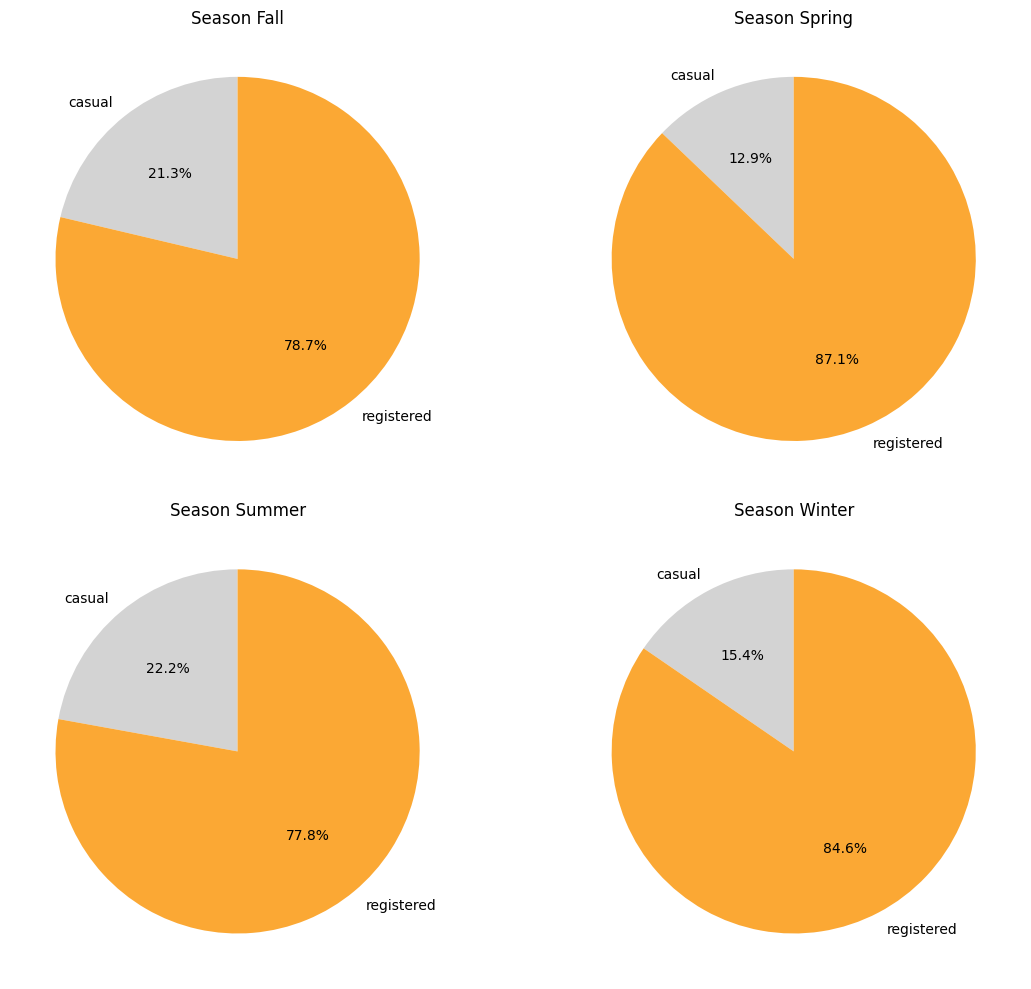

In [ ]:
# Menentukan Warna Yang Akan Dipakai Pada Grafik
colors = ["#D3D3D3", "#FBA834"]

# Mengelompokkan DataFrame berdasarkan Season dan Menjumlahkan Kolom Registered & Casual
seasonal_users = day_df.groupby('season')[['casual', 'registered']].sum()

# Membuat Pie Chart Untuk Setiap Musim
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

# Melakukan Looping Pada Setiap Musim & Menggambarkan Pie Chart
for i, (season, data) in enumerate(seasonal_users.iterrows()):
    ax = axes[i]
    ax.pie(data, labels=data.index, autopct='%1.1f%%', startangle=90, colors=colors)
    ax.set_title(f"Season {season}")

# Menampilkan Pie Chart
plt.tight_layout()
plt.show()

Dari visualisasi di atas, didapatkan data bahwa jumlah peminjam sepeda yang berupa Registered User paling banyak & persentase paling banyak adalah 87,1% yang teregistrasi pada saat Spring Season.

## **Conclusion**

**Conclution pertanyaan 1: Bagaimana Performa Peminjaman Sepeda Pada 2 Tahun Terakhir?**

> Pada tahun 2011, peak season peminjaman sepeda berada pada bulan Juli & peak season peminjaman sepeda pada tahun 2012 berada pada bulan September.





**Conclution pertanyaan 2: Bagaimana Kondisi Weather/Cuaca Dapat Mempengaruhi Jumlah Peminjaman Sepeda Pada Casual & Registered User?**

> Ya, mempengaruhi. Peminjaman sepeda signifikan terjadi saat cuaca sedang cerah (Clear/Partly Cloudy).





**Conclution pertanyaan 3: Apakah variabel season mempengaruhi jumlah peminjaman sepeda pada Casual & Registered User?**

> Ya, mempengaruhi. Orang-orang banyak meminjam sepeda saat Fall Season atau Musim Gugur.



**Conclution pertanyaan 4: Manakah peminjam terbanyak setiap musim? Pada musim apa mereka banyak meminjam sepeda?**

> Registered User, pada Spring Season.




# **Menerapkan Teknik Analisis Lanjutan (RFM Analysis & Geoanalysis)**

**1. Teknik RFM Analysis**

> RFM Analysis merupakan salah satu metode yang umum digunakan untuk melakukan segmentasi pelanggan (mengelompokkan pelanggan ke dalam beberapa kategori) berdasarkan tiga parameter, yaitu Recency, Frequency, dan Monetary.



*   Recency: parameter yang digunakan untuk melihat kapan terakhir seorang pelanggan melakukan transaksi.
*   Frequency: parameter ini digunakan untuk mengidentifikasi seberapa sering seorang pelanggan melakukan transaksi.
*   Monetary: parameter terakhir ini digunakan untuk mengidentifikasi seberapa besar revenue yang berasal dari pelanggan tersebut.

In [ ]:
# Menghitung tanggal saat ini berdasarkan tanggal maksimum pada kolom 'dateday' dalam DataFrame day_df
current_date = day_df['dateday'].max()

# Menghitung Recency (berapa hari sejak terakhir aktivitas peminjaman terdaftar), Frequency (jumlah aktivitas peminjaman terdaftar), dan Monetary (total aktivitas peminjaman terdaftar) dari setiap pengguna terdaftar
rfm_df = day_df.groupby('registered').agg({
    'dateday': lambda x: (current_date - x.max()).days,  # Menghitung Recency
    'count': ['count', 'sum']  # Menghitung Frequency dan Monetary
}).reset_index()

# Me-rename nama kolom agar lebih deskriptif
rfm_df.columns = ['Registered_User', 'Recency', 'Frequency', 'Monetary']

# Menampilkan lima data teratas dari hasil analisis RFM
print(rfm_df.head())

   Registered_User  Recency  Frequency  Monetary
0               20       63          1        22
1              416      704          1       431
2              432        5          1       441
3              451      372          1       754
4              472      705          1       506


In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dateday     731 non-null    datetime64[ns]
 1   season      731 non-null    category      
 2   year        731 non-null    category      
 3   month       731 non-null    category      
 4   holiday     731 non-null    category      
 5   weekday     731 non-null    category      
 6   workingday  731 non-null    category      
 7   weather     731 non-null    category      
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  casual      731 non-null    int64         
 12  registered  731 non-null    int64         
 13  count       731 non-null    int64         
dtypes: category(7), datetime64[ns](1), float64(3), int64(3)
memory usage: 46.5 KB


In [ ]:
day_df.to_csv("all_data.csv", index=False)